In [60]:
## Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [52]:
## Cargar datos 

data = pd.read_csv('../data/raw/Customer_support_data.csv').sample(3000)
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
4773,c2478440-479e-4ce4-b28a-6537a918cb46,Inbound,Order Related,Delayed,NaN,e60710ea-990a-4ac5-b1db-82db3702dd09,30/07/2023 15:24,02/08/2023 20:19,03/08/2023 09:03,03-Aug-23,SOHNA,Home,999.0,NaN,Allen Bowers,Olivia Wang,John Smith,>90,Evening,5
18309,3b59b8ef-4bdf-4bb1-9fd5-f7cf742f837d,Email,Returns,Service Centres Related,Verigood,ce4bf6f2-3f6b-479f-856f-5b6d0a26edc6,NaN,09/08/2023 12:22,09/08/2023 12:23,09-Aug-23,NaN,NaN,NaN,NaN,Pamela Perez,Zoe Yamamoto,John Smith,>90,Morning,5
25717,51994a2d-671b-4ef3-afbd-1eae632abb67,Inbound,Order Related,Delayed,NaN,13f4e488-82c4-4da8-bfc6-dcde621960a4,04/08/2023 10:04,10/08/2023 15:49,10/08/2023 15:50,10-Aug-23,JALANDHAR,Electronics,200.0,NaN,John Robinson,Nathan Patel,Michael Lee,>90,Afternoon,5
21541,56513b0f-82be-4216-bc7a-0d63d8752fcf,Inbound,Returns,Fraudulent User,NaN,c113ae5d-3bb5-4dc7-9b9a-14dc099f2577,03/08/2023 12:17,07/08/2023 11:07,08/08/2023 03:26,08-Aug-23,KISHANGANJ,Books & General merchandise,323.0,NaN,Michael Newman,Landon Tanaka,John Smith,>90,Split,5
65536,80712dc9-487c-4989-9b5b-26bab9eb909e,Outcall,Order Related,Delayed,Good ??,f66218ae-cfa5-4a36-8035-ec4ac67673fe,NaN,25/08/2023 20:03,25/08/2023 20:29,25-Aug-23,NaN,NaN,NaN,NaN,Bruce Martin,Zoe Yamamoto,Emily Chen,>90,Split,4


In [53]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 4773 to 45351
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                3000 non-null   object 
 1   channel_name             3000 non-null   object 
 2   category                 3000 non-null   object 
 3   Sub-category             3000 non-null   object 
 4   Customer Remarks         1045 non-null   object 
 5   Order_id                 2342 non-null   object 
 6   order_date_time          626 non-null    object 
 7   Issue_reported at        3000 non-null   object 
 8   issue_responded          3000 non-null   object 
 9   Survey_response_Date     3000 non-null   object 
 10  Customer_City            622 non-null    object 
 11  Product_category         625 non-null    object 
 12  Item_price               626 non-null    float64
 13  connected_handling_time  10 non-null     float64
 14  Agent_name               

In [54]:
## Tipos de datos
data.dtypes.value_counts()

object     17
float64     2
int64       1
Name: count, dtype: int64

In [55]:
## Varificación de datos nulos
data.isnull().sum()

Unique id                     0
channel_name                  0
category                      0
Sub-category                  0
Customer Remarks           1955
Order_id                    658
order_date_time            2374
Issue_reported at             0
issue_responded               0
Survey_response_Date          0
Customer_City              2378
Product_category           2375
Item_price                 2374
connected_handling_time    2990
Agent_name                    0
Supervisor                    0
Manager                       0
Tenure Bucket                 0
Agent Shift                   0
CSAT Score                    0
dtype: int64

In [56]:
## Verificar datos duplicados
data.duplicated().sum()

0

In [57]:
## Elimanar la columna "Unique id", no se necesita para nuestro análisis
data.drop('Unique id',axis=1,inplace=True)

## Análisis Univariado

### Categórica

In [58]:

for column in data.columns:
    unique_elements = data[column].nunique()
    print(f'La categoría de "{column}" tiene los siguientes elementos únicos: {unique_elements}')


La categoría de "channel_name" tiene los siguientes elementos únicos: 3
La categoría de "category" tiene los siguientes elementos únicos: 12
La categoría de "Sub-category" tiene los siguientes elementos únicos: 51
La categoría de "Customer Remarks" tiene los siguientes elementos únicos: 812
La categoría de "Order_id" tiene los siguientes elementos únicos: 2342
La categoría de "order_date_time" tiene los siguientes elementos únicos: 622
La categoría de "Issue_reported at" tiene los siguientes elementos únicos: 2869
La categoría de "issue_responded" tiene los siguientes elementos únicos: 2737
La categoría de "Survey_response_Date" tiene los siguientes elementos únicos: 31
La categoría de "Customer_City" tiene los siguientes elementos únicos: 324
La categoría de "Product_category" tiene los siguientes elementos únicos: 9
La categoría de "Item_price" tiene los siguientes elementos únicos: 389
La categoría de "connected_handling_time" tiene los siguientes elementos únicos: 10
La categoría d

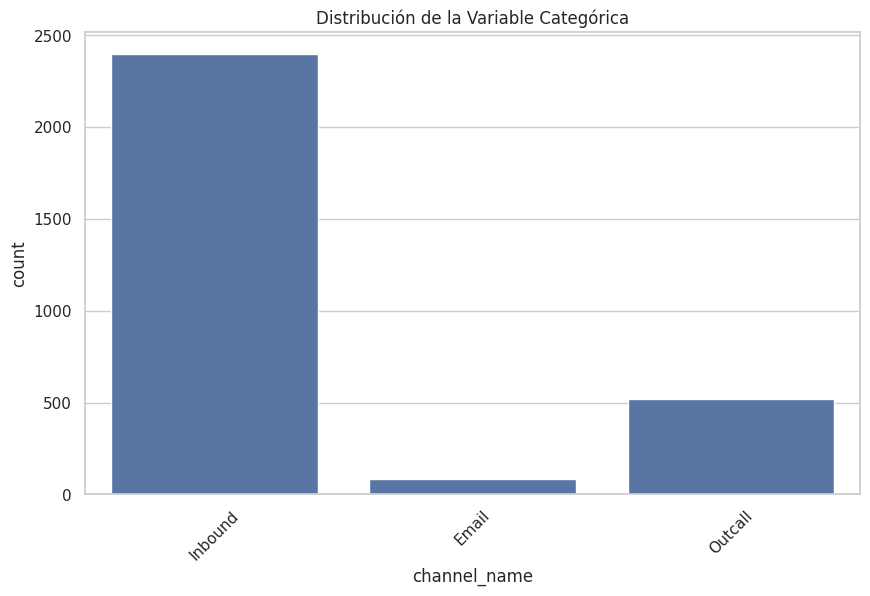

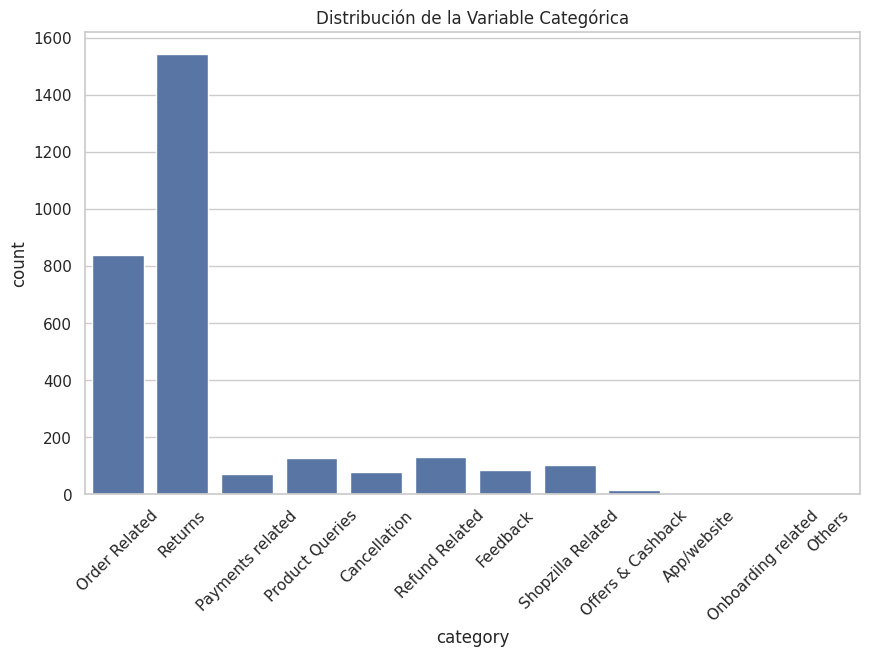

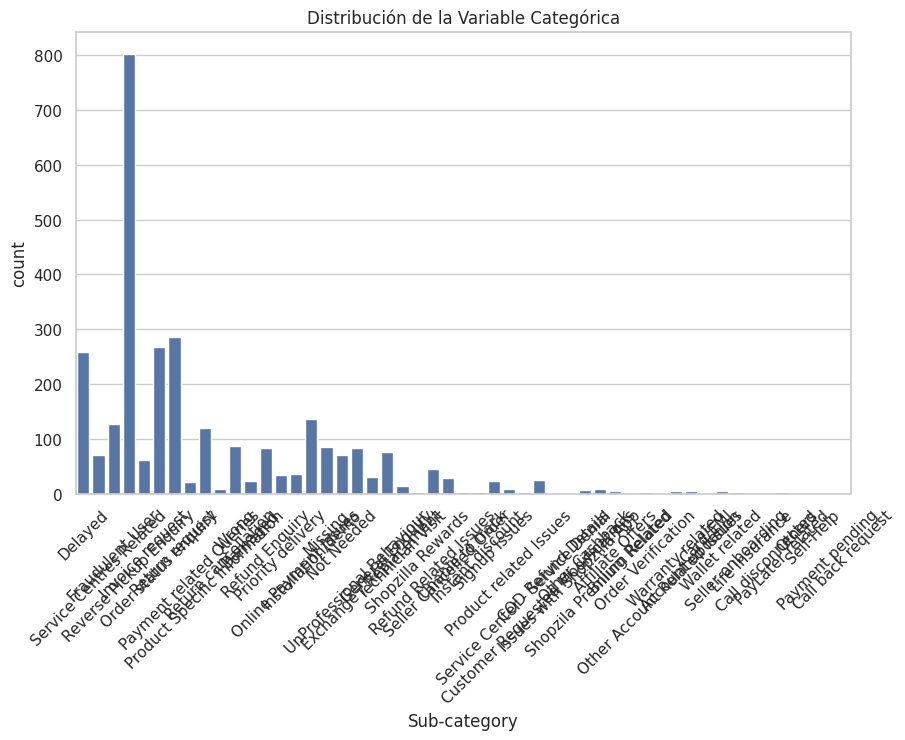

KeyboardInterrupt: 

In [63]:
# Visualizar la distribución de categorías
for column in data.columns:
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title('Distribución de la Variable Categórica')
    plt.xticks(rotation=45)
    plt.show()
